# Predicting H2 Equivalence and Reaction Time in Catalytic H2 Release

## Introduction

This data set is taken from some of the research carried out during my Ph.D in chemistry. It details the various reaction conditions used in the catalytic release of hydrogen as an alternative and more environmentally friendly fuel source. While this research gave promising results, the reaction conditions require further optimisation, which means countless more experiments and time spent in the laboratory, changing one small reaction parameter at a time. Machine learning negates the need for this lengthy process and is therefore an ideal tool for assisting in such chemical problems. It has recently been utilised in predicting reaction times and conditions in very specific types of chemical reactions. It was my desire to apply machine learning to this particular data set and analyse its performance in this topical area of chemistry. By learning from such a data set, the ultimate goal is to be able to input the chemical structure of a catalyst and for the computer to return the various reaction conditions required for an optimal reaction. This notebook is my first attempt at machine learning and reports my inital findings using the open source library fastai, which will be further built on in the coming months.              

## Data Manipulation

### Loading Libraries and Data File

In [472]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from fastai import *
from fastai.tabular import *

from sklearn.model_selection import train_test_split

In [473]:
df = pd.read_csv("Data/H2_Database2csv.csv")
print(df.shape)
df.info()

(250, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 19 columns):
Reaction                   250 non-null object
Code                       250 non-null object
MF                         250 non-null object
MW                         250 non-null float64
Mol Catalyst               250 non-null float64
SMILES (Ligand)            250 non-null object
Solvent Volume (mL)        250 non-null float64
Catalyst Percentage (%)    250 non-null float64
Substrate                  250 non-null object
Substrate Weight (g)       250 non-null float64
MF.1                       250 non-null object
SMILES (Substrate)         250 non-null object
Mol Substrate              250 non-null float64
Temperature ©              250 non-null int64
Solvent                    250 non-null object
MF.2                       250 non-null object
SMILES (Solvent)           250 non-null object
Time (hr)                  250 non-null float64
H2 Equivalence             250 no

In [474]:
df.head()

,Reaction,Code,MF,MW,Mol Catalyst,SMILES (Ligand),Solvent Volume (mL),Catalyst Percentage (%),Substrate,Substrate Weight (g),MF.1,SMILES (Substrate),Mol Substrate,Temperature ©,Solvent,MF.2,SMILES (Solvent),Time (hr),H2 Equivalence
0,PR Old,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.000162,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10.0,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,1.10
1,PR Old,None,None,0.00,0.000000,None,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,0.07
2,PR Old,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.000162,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10.0,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,6.0,1.20
3,PR Old,None,None,0.00,0.000000,None,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,24.0,1.20
4,PR Old,None,None,0.00,0.000000,None,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,60.0,1.30


In [475]:
df = df.drop(columns="Reaction")
df.head()

,Code,MF,MW,Mol Catalyst,SMILES (Ligand),Solvent Volume (mL),Catalyst Percentage (%),Substrate,Substrate Weight (g),MF.1,SMILES (Substrate),Mol Substrate,Temperature ©,Solvent,MF.2,SMILES (Solvent),Time (hr),H2 Equivalence
0,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.000162,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10.0,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,1.10
1,None,None,0.00,0.000000,None,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,0.07
2,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.000162,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10.0,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,6.0,1.20
3,None,None,0.00,0.000000,None,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,24.0,1.20
4,None,None,0.00,0.000000,None,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,60.0,1.30


This data set contains 'None' values for empty row inputs which is not compatible with pandas, so these values must be converted to the more formally recognised 'NaN' notation:

In [476]:
df = df.replace("None", np.nan)
df.head()

,Code,MF,MW,Mol Catalyst,SMILES (Ligand),Solvent Volume (mL),Catalyst Percentage (%),Substrate,Substrate Weight (g),MF.1,SMILES (Substrate),Mol Substrate,Temperature ©,Solvent,MF.2,SMILES (Solvent),Time (hr),H2 Equivalence
0,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.000162,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10.0,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,1.10
1,NaN,NaN,0.00,0.000000,NaN,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,0.07
2,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.000162,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10.0,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,6.0,1.20
3,NaN,NaN,0.00,0.000000,NaN,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,24.0,1.20
4,NaN,NaN,0.00,0.000000,NaN,10.0,0.0,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,60.0,1.30


## Data Visualisation

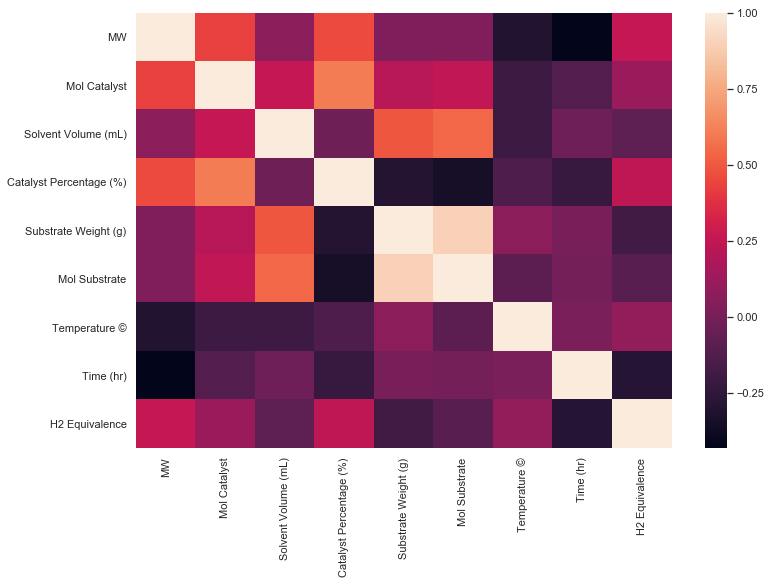

In [566]:
f, ax = plt.subplots(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

Columns with high correlation:
- Substrate Weight (g) vs Mol Substrate

Columns with medium correlaton:
- Catalyst Percentage (%) vs MW
- Mol Catalyst vs MW
- Solvent Volume (mL) vs Mol Substrate

Columns with low correlation:
- Mol Catalyst vs Solvent Volume (mL)
- Mol Catalyst vs Substrate Weight (g)
- Mol Catalyst vs Mol Substrate
- H2 Equivalence vs MW
- H2 Equivalence vs Catalyst Percentage (%)

### Create Training and Test Sets

This section takes advantage of fastai's useful split function which automatically separates the data into training and test sets, mitigating the need for manual assignment of the X and Y values. Such a separation of the data set is necessary as, while carrying out training on the entire data set would return accurate predictions, the learning algorithm would not be as accurate when predicitng similar future data sets. The test size in this instance was initially set to 20%, but it was found that further reduction to 10% resulted in a higher prediction accuracy.    


In [478]:
df_train, df_test = train_test_split(df, test_size=0.1)

In [482]:
df_train.head()

,Code,MF,MW,Mol Catalyst,SMILES (Ligand),Solvent Volume (mL),Catalyst Percentage (%),Substrate,Substrate Weight (g),MF.1,SMILES (Substrate),Mol Substrate,Temperature ©,Solvent,MF.2,SMILES (Solvent),Time (hr),H2 Equivalence
137,COC72_RuOTf,C26H27N2O3S3F3Ru,669.76,0.000320,CSC1=C(NC(\C)=C/C(C)=NC2=C(SC)C=CC=C2)C=CC=C1,20.0,0.5,DMAB,3.77,C2H10BN,[BH3-][NH+](C)C,0.063985,40,DCE,C2H4Cl2,ClCCCl,6.00,0.96
148,COC72_RuOTf,C26H27N2O3S3F3Ru,669.76,0.000081,CSC1=C(NC(\C)=C/C(C)=NC2=C(SC)C=CC=C2)C=CC=C1,2.5,0.5,AB,0.50,BH6N,[BH3-][NH3+],0.016197,22,THF/H2O,C4H10O2,C1CCOC1 O,0.06,3.00
13,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.000162,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10.0,0.5,AB,1.00,BH6N,[BH3-][NH3+],0.032394,42,BmimCl,C8H15ClN2,CCCC[N]1C=C[N+](=C1)C Cl,110.00,0.65
82,COC162_RuOTf,C32H39N2O3SF3Ru,689.79,0.000081,CCC1=CC=CC(=C1NC(\C)=C/C(C)=NC2=C(CC)C=CC=C2CC)CC,5.0,0.5,DMAB,0.95,C2H10BN,[BH3-][NH+](C)C,0.016124,42,THF,C4H8O,C1CCOC1,0.40,0.95
74,COC72_RuOTf,C26H27N2O3S3F3Ru,669.76,0.000081,CSC1=C(NC(\C)=C/C(C)=NC2=C(SC)C=CC=C2)C=CC=C1,5.0,0.5,DMAB,0.95,C2H10BN,[BH3-][NH+](C)C,0.016124,22,THF,C4H8O,C1CCOC1,1.00,0.90


In [483]:
print("Shape of training set:", df_train.shape)
print("Shape of test set:", df_test.shape)

Shape of training set: (225, 18)
Shape of test set: (25, 18)


### Dealing with Categorical Variables

Following the example given [here](https://docs.fast.ai/tabular.html), the 'dependent' variable was selected and the remaining columns in the data set separated into two variables: 'categorical' and 'continuous'. Once the dependent and categorical variables are assigned, fastai assumes the remaining column data to be continuous variables.    

In [506]:
dep_var = "H2 Equivalence"
cat_names = ["Code", "MF", "SMILES (Ligand)", "Substrate", "MF.1", "SMILES (Substrate)", "Solvent", "MF.2", "SMILES (Solvent)"]

## Machine Learning with the First Dependent Variable

Before applying machine learning to the data set, the missing 'NaN' values need to be replaced with something more compatable such as continuous variables, which will be normalised and then fed into the model:

In [507]:
tfms1 = [FillMissing, Categorify]

The now treated information is then passed to the following method which creates the DataBunch used for training: 

In [508]:
data1 = TabularDataBunch.from_df("./tmp", df_train, df_test, dep_var1, tfms=tfms1, cat_names=cat_names)

In [509]:
print(data1.train_ds.cont_names)

['Temperature ©', 'Catalyst Percentage (%)', 'Mol Catalyst', 'MW', 'Substrate Weight (g)', 'Solvent Volume (mL)', 'Time (hr)', 'Mol Substrate']


Now that the data set is ready for training, lets take a look at a sample of the data before creating a Learner model.

In [510]:
(cat_x,cont_x),y = next(iter(data1.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[33  4  6  1  1  4 15  5  1]
 [48 34 26  3  2  2 15  5  1]
 [16  1 27  3  2  2 15  5  1]
 [37 21  2  2  4  1 15  5  1]
 [31 27 24  3  2  2 15  5  1]]
[[-0.01386364  0.42866296  1.7307197   0.06864586 -0.22462685  0.5661133
   1.0659295   0.60011196]
 [-0.01386364  0.42866296  0.21140416  0.42736846 -0.27594805 -0.37568572
  -0.15143362 -0.4403546 ]
 [-0.01386364  0.42866296 -0.6829698   0.27804297 -0.8507453  -0.37568572
  -0.55722135 -1.0535754 ]
 [-0.3529194   0.42866296  0.2076698   0.14180042  0.64783335 -0.37568572
   1.038877   -0.44287407]
 [-0.01386364  0.42866296  0.21140416  0.5349379  -0.27594805 -0.37568572
  -0.68436813 -0.4403546 ]]
[1.6 1.  1.  0.7 0.9]


After being processed in TabularDataset, the categorical variables are replaced by ids and the continuous variables are normalized. The codes corresponding to categorical variables are all put together, as are all the continuous variables.

In [511]:
learn1 = get_tabular_learner(data1, layers=[200,100])

In [512]:
learn1.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


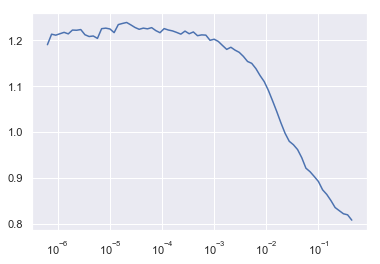

In [513]:
learn1.recorder.plot()

In [535]:
learn1.fit_one_cycle(30, 10e-2)

Total time: 00:12
epoch  train_loss  valid_loss
1      0.045025    0.064692    (00:00)
2      0.053423    0.095665    (00:00)
3      0.055969    0.190731    (00:00)
4      0.060575    0.074232    (00:00)
5      0.062564    0.298316    (00:00)
6      0.067734    0.186803    (00:00)
7      0.070620    0.437669    (00:00)
8      0.081173    0.509359    (00:00)
9      0.079998    0.072969    (00:00)
10     0.080350    0.532734    (00:00)
11     0.082613    0.267794    (00:00)
12     0.081521    0.142374    (00:00)
13     0.084554    0.134580    (00:00)
14     0.091030    0.114216    (00:00)
15     0.087323    0.084003    (00:00)
16     0.083359    0.141029    (00:00)
17     0.078708    0.080007    (00:00)
18     0.076185    0.172900    (00:00)
19     0.071988    0.090164    (00:00)
20     0.070031    0.090204    (00:00)
21     0.066935    0.082064    (00:00)
22     0.063770    0.058802    (00:00)
23     0.061517    0.059763    (00:00)
24     0.058758    0.062376    (00:00)
25     0.054976 

The resulting trained data is then split into predictions and targets using the following function:

In [536]:
pred1, targ1 = learn1.get_preds()

In [537]:
pred1

tensor([0.8532, 1.6860, 0.9351, 0.9210, 0.6641, 0.1717, 0.9210, 0.7316, 1.1116,
        0.9405, 0.9210, 0.9118, 0.8687, 1.1020, 0.9034, 0.8358, 0.8614, 0.7897,
        0.7796, 0.5220, 0.0785, 0.8905, 0.8613, 1.3771, 0.9210])

In [538]:
targ1

tensor([0.9500, 1.8000, 0.9000, 0.9000, 0.8000, 0.0300, 0.9000, 1.1000, 1.0000,
        0.7000, 0.9000, 0.9000, 1.0000, 1.0000, 0.9500, 0.9500, 0.7000, 0.9000,
        0.0700, 0.9000, 0.0200, 0.9000, 0.4000, 0.9500, 0.6500])

In order to see a more comparable value the difference between the prediction and target values are calculated and the percentage accuracy displayed:

In [539]:
diff1 = pred1-targ1

In [540]:
diff1

tensor([-0.0968, -0.1140,  0.0351,  0.0210, -0.1359,  0.1417,  0.0210, -0.3684,
         0.1116,  0.2405,  0.0210,  0.0118, -0.1313,  0.1020, -0.0466, -0.1142,
         0.1614, -0.1103,  0.7096, -0.3780,  0.0585, -0.0095,  0.4613,  0.4271,
         0.2710])

In [541]:
prct1 = targ1/pred1*100

In [542]:
prct1

tensor([111.3487, 106.7590,  96.2437,  97.7172, 120.4562,  17.4687,  97.7172,
        150.3622,  89.9572,  74.4293,  97.7172,  98.7018, 115.1169,  90.7439,
        105.1549, 113.6673,  81.2640, 113.9629,   8.9794, 172.4057,  25.4938,
        101.0626,  46.4392,  68.9880,  70.5735])

In [543]:
results1 = pd.DataFrame(data = np.column_stack((targ1.numpy(),pred1.numpy(),diff1.numpy(),prct1.numpy())), columns = ["Targets1","Predictions1","Difference1","Percentage1"])

In [544]:
results1.head(25)

,Targets1,Predictions1,Difference1,Percentage1
0,0.95,0.853176,-0.096824,111.348663
1,1.80,1.686040,-0.113960,106.759048
2,0.90,0.935127,0.035127,96.243652
3,0.90,0.921026,0.021026,97.717163
4,0.80,0.664142,-0.135858,120.456192
5,0.03,0.171735,0.141735,17.468746
6,0.90,0.921026,0.021026,97.717163
7,1.10,0.731567,-0.368433,150.362198
8,1.00,1.111640,0.111640,89.957169
9,0.70,0.940490,0.240490,74.429283


### Dealing with New Categorical Variables

It was desirable to feed two dependent variables into the deep learning network, however, fastai would not accept the two different variables in the one command, thus a second learning model was carried out.

In [549]:
dep_var2 = "Time (hr)"
cat_names = ["Code", "MF", "SMILES (Ligand)", "Substrate", "MF.1", "SMILES (Substrate)", "Solvent", "MF.2", "SMILES (Solvent)"]

## Machine Learning with the Second Dependent Variable

In [550]:
tfms2 = [FillMissing, Categorify]

In [551]:
data2 = TabularDataBunch.from_df("./tmp", df_train, df_test, dep_var2, tfms=tfms2, cat_names=cat_names)

In [552]:
print(data2.train_ds.cont_names)

['Temperature ©', 'H2 Equivalence', 'Catalyst Percentage (%)', 'Mol Catalyst', 'MW', 'Substrate Weight (g)', 'Solvent Volume (mL)', 'Mol Substrate']


In [553]:
learn2 = get_tabular_learner(data2, layers=[200,100])

In [554]:
learn2.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


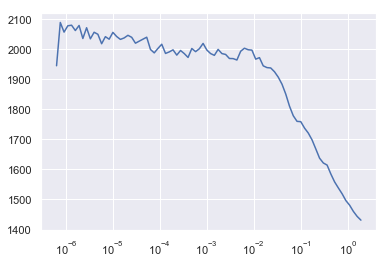

In [555]:
learn2.recorder.plot()

In [556]:
learn2.fit_one_cycle(30, 10e-1)

Total time: 00:11
epoch  train_loss  valid_loss   
1      1790.486328  1323.203613   (00:00)
2      1479.766846  7536.454590   (00:00)
3      1232.348022  6070.047363   (00:00)
4      1101.435059  17417.431641  (00:00)
5      1036.792358  7230.678223   (00:00)
6      953.389099  2538.948486    (00:00)
7      885.160217  3573.461670    (00:00)
8      819.601257  1460.932373    (00:00)
9      775.333496  2929.767822    (00:00)
10     751.957214  3875.474121    (00:00)
11     734.977051  3549.478027    (00:00)
12     710.032166  2427.880615    (00:00)
13     707.215637  2040.497070    (00:00)
14     680.707153  2847.148438    (00:00)
15     662.840393  1859.615723    (00:00)
16     634.722839  1727.209229    (00:00)
17     619.127136  1413.118408    (00:00)
18     588.242188  1427.446411    (00:00)
19     569.039429  1621.143311    (00:00)
20     547.363647  1548.120728    (00:00)
21     527.111511  1236.032227    (00:00)
22     508.078156  1563.067871    (00:00)
23     483.964020  1426.6

In [557]:
pred2, targ2 = learn2.get_preds()

In [558]:
pred2

tensor([  4.6602,   8.3977,   4.5392,   4.0984,  39.0970,  98.1196,   4.0984,
         61.3060,  46.1462,   8.7469,   4.0984,   0.7835,   3.8263,  47.6239,
          2.6324,  27.9889, 107.1602,  -4.9115,  71.0817,  38.5141, 103.6562,
         71.6540,  11.4825, 101.0366,   4.5567])

In [559]:
targ2

tensor([  2.0000,  10.0000,   1.0000,   0.3000,  30.0000, 200.0000,   0.3000,
         60.0000,  20.0000,   6.0000,   0.3000,   0.0400,   8.0000,   1.3000,
          2.0000,   2.0000,  20.0000,   0.0400,  20.0000,  54.0000,  20.0000,
          0.7000,  26.0000,  27.0000,   0.3000])

In [560]:
diff2 = pred2-targ2

In [561]:
diff2

tensor([   2.6602,   -1.6023,    3.5392,    3.7984,    9.0970, -101.8804,
           3.7984,    1.3060,   26.1462,    2.7469,    3.7984,    0.7435,
          -4.1737,   46.3239,    0.6324,   25.9889,   87.1602,   -4.9515,
          51.0817,  -15.4859,   83.6562,   70.9540,  -14.5175,   74.0366,
           4.2567])

In [562]:
prct2 = targ2/pred2*100

In [563]:
prct2

tensor([ 42.9165, 119.0796,  22.0303,   7.3200,  76.7323, 203.8329,   7.3200,
         97.8696,  43.3405,  68.5959,   7.3200,   5.1053, 209.0802,   2.7297,
         75.9770,   7.1457,  18.6636,  -0.8144,  28.1366, 140.2083,  19.2946,
          0.9769, 226.4321,  26.7230,   6.5837])

In [564]:
results2 = pd.DataFrame(data = np.column_stack((targ2.numpy(),pred2.numpy(),diff2.numpy(),prct2.numpy())), columns = ["Targets2","Predictions2","Difference2","Percentage2"])

In [565]:
results2.head(25)

,Targets2,Predictions2,Difference2,Percentage2
0,2.00,4.660213,2.660213,42.916496
1,10.00,8.397741,-1.602259,119.079636
2,1.00,4.539211,3.539211,22.030262
3,0.30,4.098351,3.798351,7.320018
4,30.00,39.096977,9.096977,76.732269
5,200.00,98.119583,-101.880417,203.832916
6,0.30,4.098351,3.798351,7.320018
7,60.00,61.306046,1.306046,97.869629
8,20.00,46.146233,26.146233,43.340485
9,6.00,8.746873,2.746873,68.595947


## Conclusions

From the initial results, the findings using this particular data set suggest a promising start for deep learning in this area of chemistry. The first dependent variable "H2 Equivalence" was predicted considerably more accurately in contrast to the second dependent variable "Time (hr)". This is more than likely due to the smaller values associated with the first dependent variable, returning 56% prediction accuracy (where the value for 'percentage1' is within 10% of 100). As for the second dependent variable, the large differences in values for "Time (hr)" result in a significantly lower prediction accuracy, where only 2 of the returned values were within the desired range.

While this is a good start, the prediction accuracy needs to be improved considerably. This could be achieved with a much larger data set, as the current information is more than likely too small with not enough variations. However, if this does not improve the prediction accuracy it is possible that the model is being underfit and an alternate machine learning method may need to be used.

While the ultimate goal mentioned in the introduction is a long way from being achieved, the first steps have been taken and initial results would suggest that it is definitely possible. A singificant amount of further knowledge is required in order to achieve this long term goal, which would not only accelerate this area of chemistry but also completely change the field as we know it.    